<a href="https://colab.research.google.com/github/AlyssonBatista/processamento-de-imagens-m-dicas-/blob/main/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O 'alta.jpg' 'https://live.staticflickr.com/65535/51888301665_0d6a9d6d70_t.jpg'

--2022-08-22 19:58:35--  https://live.staticflickr.com/65535/51888301665_0d6a9d6d70_t.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 18.64.177.82, 2600:9000:2342:b600:0:5a51:64c9:c681, 2600:9000:2342:8800:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|18.64.177.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘alta.jpg’

alta.jpg                [ <=>                ]   1.39K  --.-KB/s    in 0s      

2022-08-22 19:58:35 (54.9 MB/s) - ‘alta.jpg’ saved [1428]



# INTERPOLAÇÃO DE IMAGENS

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

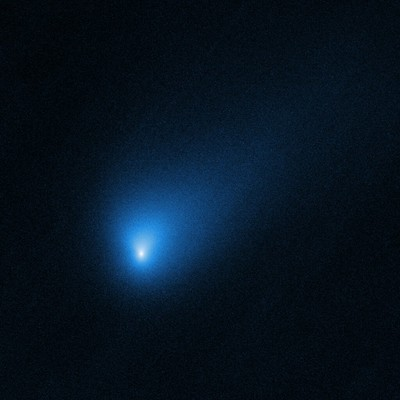

In [ ]:
imagem1 = cv2.imread('alta.jpg')
cv2_imshow(imagem1)

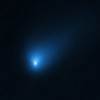

In [ ]:
imagem2 = cv2.imread('baixa.jpg')
cv2_imshow(imagem2)

## Tons de cinza

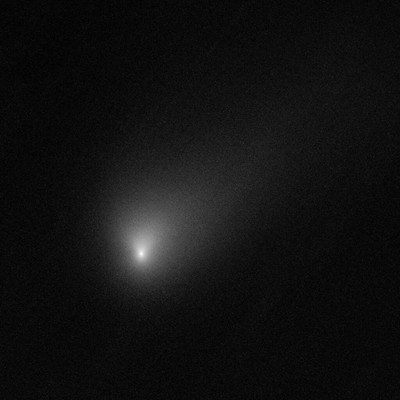

In [ ]:
imgGrey1 = cv2.imread('alta.jpg',0)
cv2_imshow(imgGrey1)

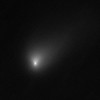

In [ ]:
imgGrey2 = cv2.imread('baixa.jpg',0)
cv2_imshow(imgGrey2)

## Interpolação por vizinho mais próximo

### Alta para baixa resolução

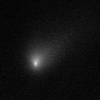

In [ ]:
altaBaixa1 = cv2.resize(imgGrey1, dsize=(100,100), interpolation=cv2.INTER_NEAREST)
cv2_imshow(altaBaixa1)

### Baixa para uma alta resolução

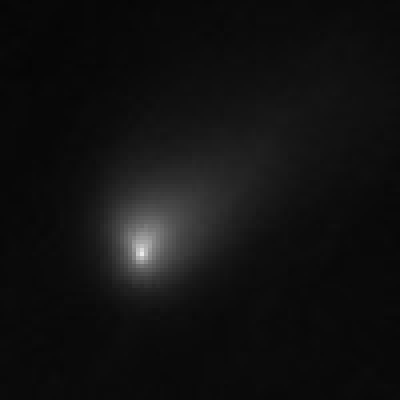

In [ ]:
baixaAlta1 = cv2.resize(imgGrey2, dsize=(400,400), interpolation=cv2.INTER_NEAREST)
cv2_imshow(baixaAlta1)

## Interpolação bilinear

### Alta para baixa resolução

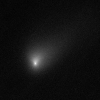

In [ ]:
altaBaixa2 = cv2.resize(imgGrey1, dsize=(100,100),interpolation=cv2.INTER_LINEAR_EXACT)
cv2_imshow(altaBaixa2)

### Baixa para alta resolução

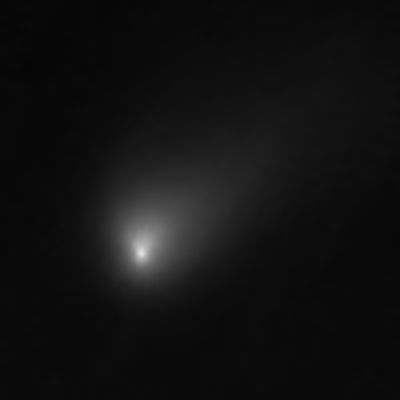

In [ ]:
baixaAlta2 = cv2.resize(imgGrey2, dsize=(400,400),interpolation=cv2.INTER_LINEAR_EXACT)
cv2_imshow(baixaAlta2)

## Interpolação bicúbica

### Alta para baixa resolução

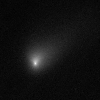

In [ ]:
altaBaixa3 = cv2.resize(imgGrey1, dsize=(100,100),interpolation=cv2.INTER_CUBIC)
cv2_imshow(altaBaixa3)

### Baixa para alta resolução

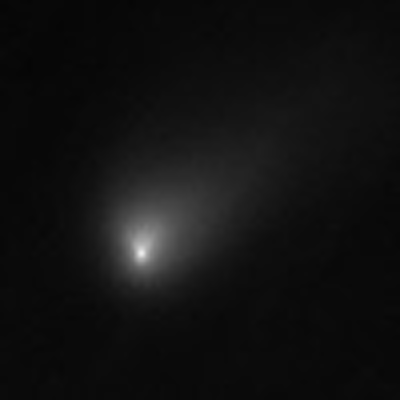

In [ ]:
baixaAlta3 = cv2.resize(imgGrey2, dsize=(400,400),interpolation=cv2.INTER_CUBIC)
cv2_imshow(baixaAlta3)

## Comparação entre as 3 imagens interpoladas

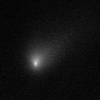

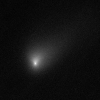

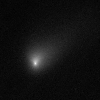

In [ ]:
cv2_imshow(altaBaixa1)
cv2_imshow(altaBaixa2)
cv2_imshow(altaBaixa3)

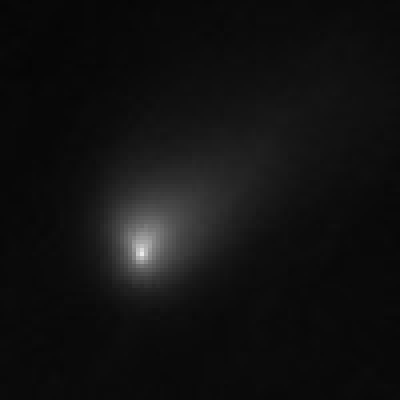

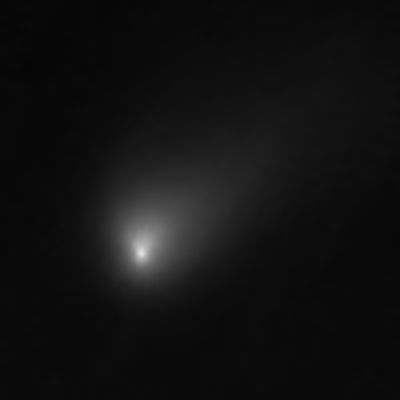

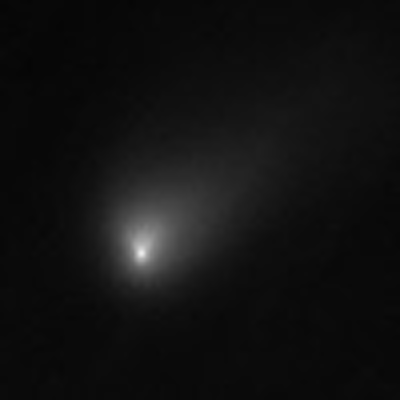

In [ ]:
cv2_imshow(baixaAlta1)
cv2_imshow(baixaAlta2)
cv2_imshow(baixaAlta3)

# Avaliação objetiva PSNR,SSIM
[referência para avalição objetiva](https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/main/_notebooks/2020-10-13-01-Super-Resolution-CNN.ipynb#scrollTo=G9YlitOESRhh)

[Biblioteca metrics](https://scikit-image.org/docs/stable/api/skimage.metrics.html#skimage.metrics.peak_signal_noise_ratio)

In [ ]:
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio



## (SSIM)

In [ ]:
(score,a) = structural_similarity(imgGrey2,altaBaixa1,full=True)
print("vizinho - SSIM",score)
(score,a) = structural_similarity(imgGrey2,altaBaixa2,full=True)
print("bilinear - SSIM",score)
(score,a) = structural_similarity(imgGrey2,altaBaixa3,full=True)
print("bicubica - SSIM",score)



vizinho - SSIM 0.895485760794776
bilinear - SSIM 0.9547029496142966
bicubica - SSIM 0.9221809919458114


In [ ]:
(score,a) = structural_similarity(imgGrey1,baixaAlta1,full=True)
print("vizinho - SSIM",score)
(score,a) = structural_similarity(imgGrey1,baixaAlta2,full=True)
print("bilinear - SSIM",score)
(score,a) = structural_similarity(imgGrey1,baixaAlta3,full=True)
print("bicubica - SSIM",score)


vizinho - SSIM 0.8954566068395798
bilinear - SSIM 0.8994715229043034
bicubica - SSIM 0.8990785067824031


## (PSNR) ACHO QUE ESTÁ ERRADO

In [ ]:
(score2) = peak_signal_noise_ratio(imgGrey2, altaBaixa1)
print('vizinho',score2)
(score2) = peak_signal_noise_ratio(imgGrey2, altaBaixa2)
print('bilinear',score2)
(score2) = peak_signal_noise_ratio(imgGrey2, altaBaixa3)
print('bicubica',score2)

vizinho 38.33695901803392
bilinear 42.898933759175605
bicubica 40.40839358252883


In [ ]:
(score2) = peak_signal_noise_ratio(imgGrey1, baixaAlta1)
print('vizinho',score2)
(score2) = peak_signal_noise_ratio(imgGrey1, baixaAlta2)
print('bilinear',score2)
(score2) = peak_signal_noise_ratio(imgGrey1, baixaAlta3)
print('bicubica',score2)

vizinho 39.23007769763979
bilinear 39.682053417921374
bicubica 39.64732262676679
